<function matplotlib.pyplot.show(close=None, block=None)>

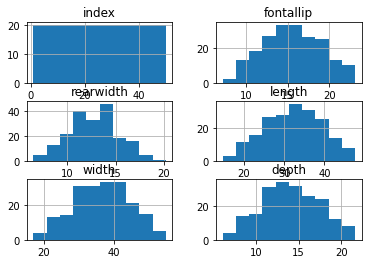

In [13]:
import pandas as pd 
url ='crabs.csv'
data = pd.read_csv(url)
import matplotlib.pyplot as plt 
data.hist()
plt.show

              index  fontallip  rearwidth    length     width     depth
index      1.000000   0.862876   0.840040  0.911436  0.928248  0.864459
fontallip  0.862876   1.000000   0.906988  0.978842  0.964956  0.987627
rearwidth  0.840040   0.906988   1.000000  0.892743  0.900402  0.889205
length     0.911436   0.978842   0.892743  1.000000  0.995023  0.983204
width      0.928248   0.964956   0.900402  0.995023  1.000000  0.967812
depth      0.864459   0.987627   0.889205  0.983204  0.967812  1.000000


<AxesSubplot:>

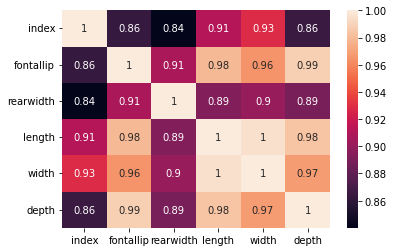

In [14]:
correlation = data.corr() #mối tương quan giữa các dữ liệu 
print(correlation)
import seaborn as sns
sns.heatmap(correlation,annot = True)

<AxesSubplot:xlabel='fontallip', ylabel='depth'>

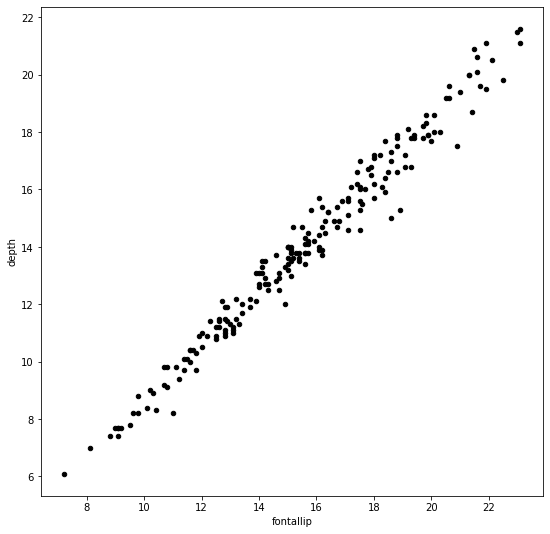

In [15]:
data.plot(kind = 'scatter',x='fontallip',y='depth',figsize=(9,9),color = 'black')

In [17]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['fontallip']),y=data['depth'])
print(model.intercept_)
print(model.coef_)
model.score(X=pd.DataFrame(data['fontallip']),y=data['depth'])

-1.0490449038767142
[0.96769203]


0.9754074794865865

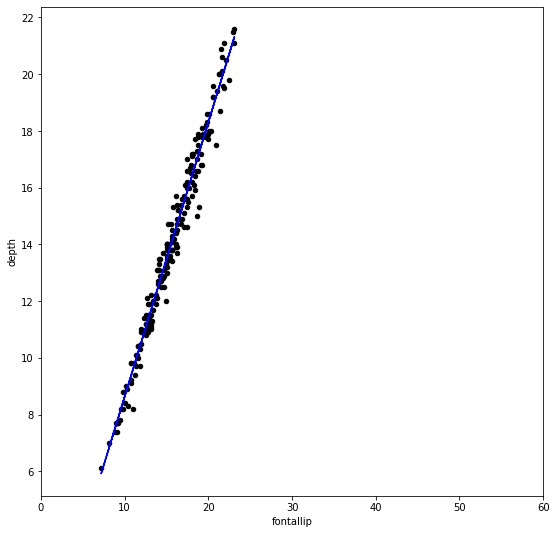

In [18]:
data.plot(kind = 'scatter',x='fontallip',y='depth',figsize=(9,9),color = 'black',xlim=(0,60))
y_pred= model.predict(X=pd.DataFrame(data['fontallip']))
plt.plot(data['fontallip'],y_pred,color='blue')    #vẽ ra đường hồi quy cho dữ liệu 

In [20]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['fontallip'],data['depth']**2]).T
model.fit(X,y=data['fontallip'])
print('Intercept cua phuong trinh la: ',model.intercept_)
print('Coef cua phuong trinh la: ',model.coef_)                         #Bậc 2
print('Do chinh xac cua phuong trinh: ',model.score(X,y=data['fontallip']))

Intercept cua phuong trinh la:  0.0
Coef cua phuong trinh la:  [1.00000000e+00 4.43410608e-19]
Do chinh xac cua phuong trinh:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


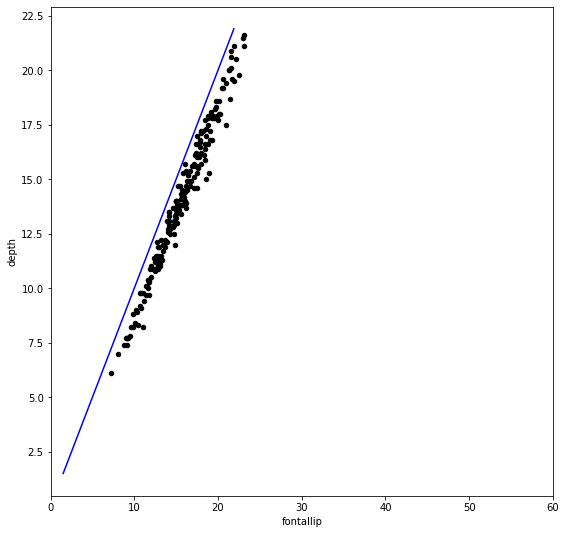

In [22]:

import numpy as np
range = np.arange(1.5,22,0.1)
data.plot(kind = 'scatter',x='fontallip',y='depth',figsize=(9,9),color = 'black',xlim=(0,60))       #Bậc 2
predictor = pd.DataFrame([range,range**2]).T
y_fred = model.predict(X=predictor)
plt.plot(range,y_fred,color='blue')